#Practice Using Inbuilt Dataset
Diabetes datasets

Linear Regression

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, model_selection

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [4]:
X, y= datasets.load_diabetes(return_X_y=True)
print(X.shape)
print(X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [5]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [6]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [7]:
#the code below is saying : should take all the column, np.newaxis to make it a proper column while the 2 means index 2 which is BMI
X = X[:, np.newaxis, 2]

In [8]:
X_train, X_test, y_train, y_test= model_selection.train_test_split(X, y, test_size=0.33)

In [9]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


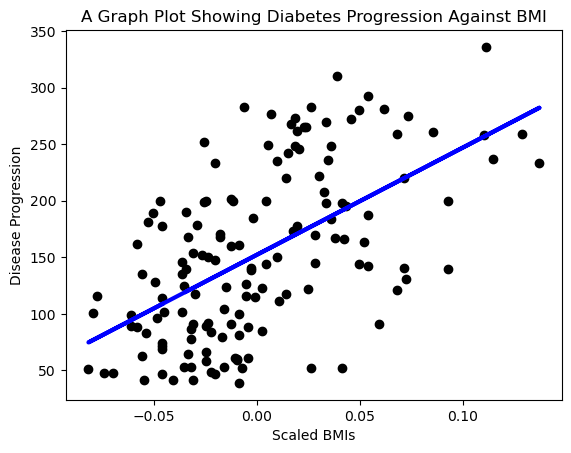

In [10]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progression')
plt.title('A Graph Plot Showing Diabetes Progression Against BMI')
plt.show()

In [14]:
# Dataset statistics for blood pressure (bp)
original_mean = 94.6  # Average mmHg in original dataset
original_std = 19.7    # Standard deviation

def mmHg_to_normalized(bp_mmHg):
    """Convert real blood pressure to normalized units"""
    return (bp_mmHg - original_mean) / original_std

def normalized_to_mmHg(bp_norm):
    """Convert normalized units back to mmHg"""
    return (bp_norm * original_std) + original_mean

In [24]:
mom_bp_mmHg = 120  # Your mom's actual blood pressure

# Convert to normalized units
mom_bp_normalized = mmHg_to_normalized(mom_bp_mmHg)
print(f"120 mmHg → {mom_bp_normalized:.2f} normalized")

# Make prediction
prediction = model.predict([[mom_bp_normalized]])
print(f"Predicted progression: {prediction[0]:.2f}")

120 mmHg → 1.29 normalized
Predicted progression: 1374.53


In [26]:
#Now asuming i want to predict my mom diabetes using my model using blood pressure not BMI 
X = df[['bp']] 
y = diabetes.target
mom_bp = 1.29
prediction = model.predict([[mom_bp]])
print(f'Predicted diabetes progression score:{prediction[0]:.2f}')


Predicted diabetes progression score:1375.15


Note: below 100 is low progression
      100 - 150 is moderate
      150 - 200 is very high
example if it shows 142.24 it means below the average of 150 the blood pressure suggest moderate diabetes progression risk

In [19]:
#Now saving my model to disk
import joblib
joblib.dump(model, 'diabetes_model.pkl')

['diabetes_model.pkl']